In [ ]:
import os     # os module for file operations
from zipfile import ZipFile     # extracting zipfile content
from sklearn.model_selection import train_test_split   # splitting data into training and validation
from sklearn.preprocessing import LabelEncoder    # converting  categories into integer numbers
import numpy as np                           # For array  operations
import cv2                                  # image preprocessing
import matplotlib.pyplot as plt               # plotting curves
import warnings                              # for ignoring warnings
warnings.filterwarnings('ignore')
import random                                 #sampling the data
import math                                   #  mathematical operations
from sklearn import metrics                   # for measuring perfomances
from keras.utils import to_categorical        # converting categories into sparse arrays
#DEFINING MODEL PARAMETERS
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.models import Sequential
from keras import optimizers   # FOR FASTER TRAIINING
from keras.preprocessing.image import ImageDataGenerator  # DATA AUGMNETATION
from keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau   # CALLBACKS
from keras.layers import Dropout,BatchNormalization      # REGULARIZATION LAYERS
from keras.optimizers import SGD,Adam   #OPTIMIZERS
from keras.applications.inception_v3 import InceptionV3    # TRANSFER LEARNING MODEL
from keras import Model
import shutil           # FOR COPYING FILES 
import pandas as pd     # FOR CREATING DATAFRAMES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path =os.getcwd()   #  getting current directory
os.chdir('/content/drive/My Drive/DATA')   # changing directory
path =os.getcwd()
print(path)


/content/drive/My Drive/DATA


TO GENERATE  FEATURES IMAGES ARE NEEDED TO BE AUGMENT BY USING IMAGE DATA GENERATOR AND SAVE IN THEIR RESPECTIVE FOLDERS

In [ ]:
path

'/content/drive/My Drive/DATA'

GENERATING IMAGES FOR IMAGE AUGMENTATION

In [ ]:
def image_generation(folder,label):
    img_dir =os.listdir(folder)
    img=os.path.join(path,label,random.choice(img_dir))
    img=load_img(img)
    x=img_to_array(img)
    x=x.reshape((1,)+x.shape)
    
    
    datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

    i=0
    for batch in datagen.flow(x,batch_size=1,save_to_dir=os.path.join(path,label),save_prefix=label,save_format='jpeg'):
        i+=1
        if i>=30:
            break

In [ ]:
folders=os.listdir(path)        # image folders in the current directory


In [ ]:
folders

['will',
 'wjsaic',
 'vstros',
 'wylsow',
 'wardcy',
 'wjhugh',
 'vpsavo',
 'yfhsie',
 'wjalbe',
 'whussa',
 'tjpret',
 'thgear',
 'virvi',
 'tjdyke',
 'tony',
 'tthurs',
 'vanta',
 'voudcx',
 'todris',
 'tom',
 'stu',
 'spyount',
 'tchand',
 'swsmit',
 'theod',
 'svkriz',
 'swewin',
 'theoc',
 'swren',
 'ste',
 'skumar',
 'spacl',
 'smredh',
 'smalga',
 'smrobb',
 'smille',
 'spletc',
 'smfarrf',
 'snhopp',
 'slbirc',
 'sidick',
 'sjkill',
 'sjpalm',
 'shpill',
 'simm',
 'sjbeck',
 'sirmcb',
 'sherbe',
 'sjcutt',
 'shamilc',
 'sar',
 'saedwa',
 'sdwall',
 'sbains',
 'sgjday',
 'sapere',
 'sdaly',
 'sandm',
 'saduah',
 'rwsick',
 'robin',
 'rnpwil',
 'rshaw',
 'rposbo',
 'rlocke',
 'rsanti',
 'rscoop',
 'rrowle',
 'rmcoll',
 'rmpugh',
 'rhosan',
 'rjlabr',
 'rjobyr',
 'rjwils',
 'rhaitk',
 'riphil',
 'rgspru',
 'rgharr',
 'rhnorm',
 'rjdunc',
 'rbrown',
 'ptnich',
 'pvaris',
 'pspliu',
 'pwest',
 'rafox',
 'rchadh',
 'reaton',
 'rarobi',
 'pshurr',
 'phughe',
 'pguan',
 'pmives',
 'pjr

In [ ]:
random.seed(47)
HUNDRED_CLASSES = random.sample(set(folders),k=100)      # SAMPLING 100 DIFFERENT PERSONS / FOLDERS

In [ ]:
len(set(HUNDRED_CLASSES))

100

In [ ]:
HUNDRED_CLASSES=[os.path.join(path,i) for i in HUNDRED_CLASSES]

CREATING TEST DATA

In [ ]:
def test_data(folders):
    data=[]
    for i in folders:
        img = random.choice(os.listdir(i))
        data.append(os.path.join(path,i.split('\\')[-1],img))
    return data
        

In [ ]:
HUNDRED_CLASSES               #  LIST OF FOLDERS OF HUNDRED CLASSES CLASSIFIER

['/content/drive/My Drive/DATA/mhoore',
 '/content/drive/My Drive/DATA/khughe',
 '/content/drive/My Drive/DATA/rshaw',
 '/content/drive/My Drive/DATA/hcarpe',
 '/content/drive/My Drive/DATA/pcfry',
 '/content/drive/My Drive/DATA/smrobb',
 '/content/drive/My Drive/DATA/dmwest',
 '/content/drive/My Drive/DATA/cprice',
 '/content/drive/My Drive/DATA/ajflem',
 '/content/drive/My Drive/DATA/djmart',
 '/content/drive/My Drive/DATA/cdlarg',
 '/content/drive/My Drive/DATA/fordj',
 '/content/drive/My Drive/DATA/9540814',
 '/content/drive/My Drive/DATA/9414649',
 '/content/drive/My Drive/DATA/swsmit',
 '/content/drive/My Drive/DATA/pmspry',
 '/content/drive/My Drive/DATA/sjpalm',
 '/content/drive/My Drive/DATA/jserai',
 '/content/drive/My Drive/DATA/pguan',
 '/content/drive/My Drive/DATA/kouri',
 '/content/drive/My Drive/DATA/hmgula',
 '/content/drive/My Drive/DATA/kelbied',
 '/content/drive/My Drive/DATA/jmedin',
 '/content/drive/My Drive/DATA/svkriz',
 '/content/drive/My Drive/DATA/mpdavie',
 

In [ ]:
TEST_DATA =test_data(HUNDRED_CLASSES)

len(set(TEST_DATA))

100

READING DATA FROM FOLDERS

In [ ]:
def READ_DATA(folders):
  data=[]
  for i in folders:
    data.append([os.path.join(path,i.split('/')[-1],file) for file in os.listdir(i)])
  flattened_list = []
  for x in data:
    for y in x:
        flattened_list.append(y)
  return flattened_list

In [ ]:
DATA = READ_DATA(HUNDRED_CLASSES)       # READING DATA FROM HUNDRED CLASSES

In [ ]:
DATA =list(set(DATA)-set(TEST_DATA))   # REMOVING EXTRA POINTS FROM TEST DATA

In [ ]:
len(DATA)

1850

CHECKING WETHER ANY ZERO BYTE IMAGES ARE PRESENT

In [ ]:
remove_duplicates=[]
for file in DATA:
    if os.path.getsize(file)==0:
         remove_duplicates.append(file)

In [ ]:
remove_duplicates

[]

CHECKING WETHER IF ANY IMAGE FORMATS ARE THERE OTHER THAN THE JPG OR NOT

In [ ]:
err=[]
da=[]
for i in DATA:
  if i.endswith('jpg') or i.endswith("jpeg"):
    da.append(i)
  else:
    err.append(i)


In [ ]:
err

[]

In [ ]:
LABELS =[i.split('/')[-2] for i in DATA]                          # DEFINING CLASSES FOR THE TRAINING DATA
TEST_LABELS = [i.split('/')[-2] for i in TEST_DATA]               # DEFINING  CLASSES FOR TEST DATA
print(len(set(LABELS)),len(set(TEST_LABELS)))

100 100


In [ ]:
nb_classes=len(set(LABELS))
nb_classes

100

LABEL ENCODING AND CONVERTING CLASSES INTO CATEGORIES

In [ ]:
le=LabelEncoder()
le.fit(LABELS)
train_labels =le.transform(LABELS)
Y=to_categorical(train_labels,nb_classes)
Y =np.array(Y)

SPLITTING DATA INTO TRAIN AND TEST

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(DATA,Y,test_size=0.30,random_state =800)

In [ ]:
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

1480 1480
370 370


In [ ]:
def READ_IMAGES(data):
    dim=(180,180)
    for img in range(len(data)):
        data[img] = cv2.imread(data[img],cv2.IMREAD_COLOR)     # REDAING IMAGES IN RGB MODE
        data[img] =cv2.resize(data[img],dim)                    # RESIZING IMAGE INTO (180 x 180)
        data[img] = data[img]/255                                 #   scaling the value between 0 and 1
        data[img] = cv2.pow(data[img],0.6)                        # applying power transformation for enhancing images 
    return np.array(data)
        

In [ ]:
X_train =READ_IMAGES(X_train)              # APPLYING CUSTOM FUNCTION FOR TRAINING DATA

In [ ]:
X_test = READ_IMAGES(X_test)               # APPLYING CUSTOM FUNCTION FOR VALIDATION DATA

In [ ]:
X_train[0].shape

(180, 180, 3)

In [ ]:
TEST_DATA = READ_IMAGES(TEST_DATA)        # APPLYING CUSTOM FUNCTION FOR TEST DATA

In [ ]:
batch_size = 40                            #DEFINING HOW MANY IMAGES TO BE PROCESSED  ONCE
classes = nb_classes                        # OUTPUT CLASSES
epochs =25                                   # EPOCHS  FOR TRAINING IMAGES

CUSTOM FUNCTION FOR SCHEDULING THE LEARNING RATE

In [ ]:
initial_lrate = 0.01

def decay(epoch, steps=200):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

CUSTOM FUNCTION FOR TESTING PERFOMANCE IN TEST DATA

In [ ]:
def perfomance(true_labels,pred_labels):
    score = metrics.accuracy_score(true_labels,pred_labels)
    return score

CUSTOM FUNCTION FOR PREDICTIONS ON TEST DATA

In [ ]:
def TEST_PREDICTIONS(data,model):
    img_pred = model.predict_classes(data)
    img_pred = le.inverse_transform(img_pred)
    return img_pred

DEFINING CALLBACKS FOR TRAINING DATA

In [ ]:
es =EarlyStopping(monitor='val_accuracy',patience=5,mode='auto',verbose=1)

# VANILLA MODEL WITHOUT ANY DROPOUT AND NORMALIZATION

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=(180,180,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))




In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
          metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 88, 88, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 44, 44, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 42, 42, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 21, 21, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 112896)           

In [ ]:
history = model.fit(x=X_train, y=Y_train,
                    validation_data=(X_test,Y_test),
                    batch_size=batch_size,
                    epochs=epochs,
                  verbose=1,callbacks=[lr_sc,es])  

Train on 1480 samples, validate on 370 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 13s 9ms/step - loss: 4.5895 - accuracy: 0.0277 - val_loss: 4.5368 - val_accuracy: 0.0405
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 4s 3ms/step - loss: 3.9644 - accuracy: 0.1223 - val_loss: 2.9893 - val_accuracy: 0.2865
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 4s 3ms/step - loss: 2.0224 - accuracy: 0.5493 - val_loss: 1.1670 - val_accuracy: 0.6541
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 4s 3ms/step - loss: 0.7268 - accuracy: 0.8223 - val_loss: 0.6183 - val_accuracy: 0.8541
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [===================

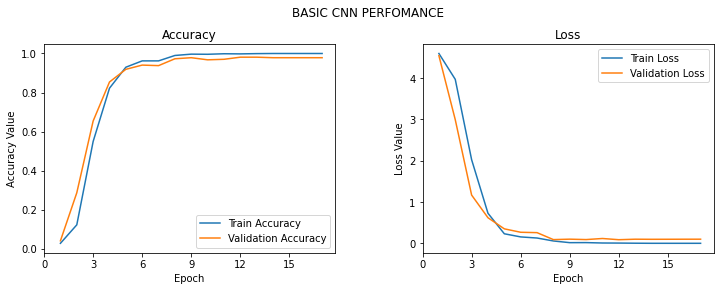

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('BASIC CNN PERFOMANCE', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,18))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 18, 3))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 18, 3))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
BASE_MODEL_PREDICTIONS = TEST_PREDICTIONS(TEST_DATA,model)


In [ ]:
print("THE VANILLA MODEL CNN PERFOMANCE IS :%d",perfomance(TEST_LABELS,BASE_MODEL_PREDICTIONS))

THE VANILLA MODEL CNN PERFOMANCE IS :%d 0.99


#ADDING DROPOUT

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(180,180,3)))
model_1.add(Dropout(0.2))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(nb_classes, activation='softmax'))


In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
dropout_5 (Dropout)          (None, 180, 180, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 88, 88, 128)       73856     
_________________________________________________________________
dropout_6 (Dropout)          (None, 88, 88, 128)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 44, 44, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 42, 42, 256)      

In [ ]:
history2= model_1.fit(x=X_train, y=Y_train,
                    validation_data=(X_test,Y_test),
                    batch_size=40,
                    epochs=25,
                  verbose=1,callbacks=[lr_sc,es])

Train on 1480 samples, validate on 370 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 7s 5ms/step - loss: 4.5693 - accuracy: 0.0162 - val_loss: 4.4530 - val_accuracy: 0.0730
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 7s 5ms/step - loss: 3.3036 - accuracy: 0.2385 - val_loss: 2.5119 - val_accuracy: 0.6432
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 7s 5ms/step - loss: 1.3978 - accuracy: 0.6473 - val_loss: 1.3461 - val_accuracy: 0.7919
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 7s 5ms/step - loss: 0.6649 - accuracy: 0.8243 - val_loss: 0.3671 - val_accuracy: 0.9405
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [====================

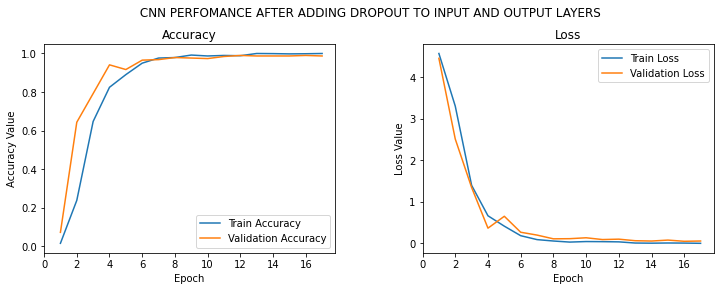

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle(' CNN PERFOMANCE AFTER ADDING DROPOUT TO INPUT AND OUTPUT LAYERS', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,18))
ax1.plot(epoch_list, history2.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 17, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 17, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
 CNN_WITH_DROPOUT_MODEL_PREDICTIONS = TEST_PREDICTIONS(TEST_DATA,model_1)


In [ ]:
print("THE  CNN WITH DROPUT PERFOMANCE IS :%d",perfomance(TEST_LABELS,CNN_WITH_DROPOUT_MODEL_PREDICTIONS))

THE  CNN WITH DROPUT PERFOMANCE IS :%d 0.99


#CHANGE IN PERFOMANCE IF WE CHANGE ACTIVATION FUNCTION , KERNEL INITIALIZER ,BATCH NORMALIZATION

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(64, kernel_size=(3, 3), activation='elu',padding='same',input_shape=(180,180,3),kernel_initializer='glorot_normal'))
model_2.add(Dropout(0.2))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(128, kernel_size=(3, 3), activation='elu'))

model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(256, kernel_size=(3, 3), activation='elu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(512, activation='relu'))

model_2.add(Dense(nb_classes, activation='softmax'))

In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])



In [ ]:
history3= model_2.fit(x=X_train, y=Y_train,
                    validation_data=(X_test,Y_test),
                    batch_size=40,
                    epochs=25,
                    verbose=1,callbacks=[lr_sc,es]) 

Train on 1480 samples, validate on 370 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 9s 6ms/step - loss: 391.0218 - accuracy: 0.0088 - val_loss: 1544.8714 - val_accuracy: 0.0027
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 8s 5ms/step - loss: 4.6394 - accuracy: 0.0101 - val_loss: 940.6136 - val_accuracy: 0.0027
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 8s 5ms/step - loss: 4.6348 - accuracy: 0.0122 - val_loss: 32.8493 - val_accuracy: 0.0081
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 8s 6ms/step - loss: 7.0593 - accuracy: 0.0128 - val_loss: 17.0020 - val_accuracy: 0.0000e+00
Epoch 5/25

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [=======

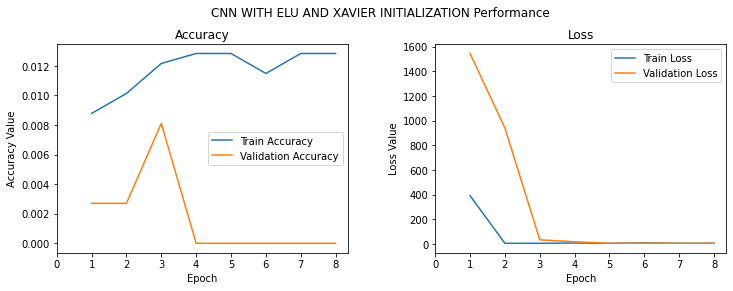

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN WITH ELU AND XAVIER INITIALIZATION Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,9))
ax1.plot(epoch_list, history3.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history3.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,9))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,9))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
 CNN_WITH_ELU_MODEL_PREDICTIONS = TEST_PREDICTIONS(TEST_DATA,model_2)


In [ ]:
print("THE  CNN WITH ELU AND XAVIER INITIALIZER PERFOMANCE IS :%d",perfomance(TEST_LABELS,CNN_WITH_ELU_MODEL_PREDICTIONS))

THE  CNN WITH ELU AND XAVIER INITIALIZER PERFOMANCE IS :%d 0.01


FROM THE ABOVE TRAININING NETWOTK WE CAN CLEARLY STATE THAT CHANGE IN ACTIVATION FUNCTION AND OPTIMIZERS VARY DIFFERENTLY 
BASED ON TRAINING DATA , SO LETS TRY BY USING DATA AUGMENTATION

TRAINING USING DATA AUGMENTATION

In [ ]:
initial_lrate = 0.1

def decay(epoch, steps=400):
    initial_lrate = 0.01
    drop = 0.6
    epochs_drop = 10
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=30,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen =  ImageDataGenerator(rescale=1./255)

In [ ]:
DATA[0]

'/content/DATA/nhahme/nhahme.9.jpg'

In [ ]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=40)
val_generator = train_datagen.flow(X_test,Y_test, batch_size=32)

In [ ]:
model_4 = Sequential()

model_4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(180,180,3)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(BatchNormalization())


model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(BatchNormalization())

model_4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(BatchNormalization())


model_4.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(BatchNormalization())


model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(512,activation='relu'))
model_4.add(Dense(nb_classes, activation='softmax'))




In [ ]:
model_4.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history4= model_4.fit_generator(train_generator,
                    validation_data=val_generator,
                    epochs=45,
                    verbose=1,callbacks=[lr_sc])         

Epoch 1/45

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
37/37 [==============================] - 13s 361ms/step - loss: 4.5904 - accuracy: 0.0824 - val_loss: 16.8770 - val_accuracy: 0.0081
Epoch 2/45

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
37/37 [==============================] - 12s 334ms/step - loss: 3.5004 - accuracy: 0.1851 - val_loss: 58.4651 - val_accuracy: 0.0081
Epoch 3/45

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
37/37 [==============================] - 13s 340ms/step - loss: 2.8452 - accuracy: 0.2527 - val_loss: 82.5973 - val_accuracy: 0.0081
Epoch 4/45

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
37/37 [==============================] - 13s 339ms/step - loss: 2.5382 - accuracy: 0.3169 - val_loss: 64.8993 - val_accuracy: 0.0054
Epoch 5/45

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
37/37 [==============================] - 13s 339ms/step - loss: 2.1955 - accur

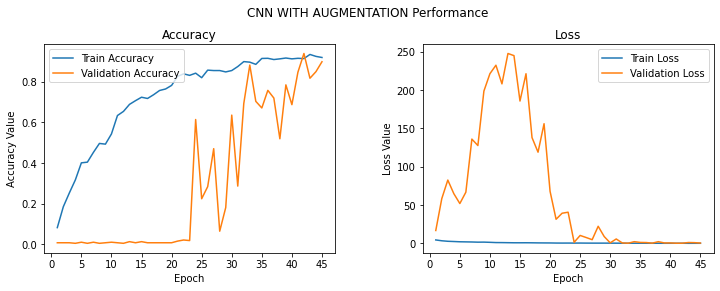

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN WITH AUGMENTATION Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,46))
ax1.plot(epoch_list, history4.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history4.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0,46,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history4.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history4.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,46,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
 CNN_WITH_AUGMENTATION_MODEL_PREDICTIONS = TEST_PREDICTIONS(TEST_DATA,model_4)

In [ ]:
print("THE  CNN WITH  AUGMENTATION AND XAVIER INITIALIZER PERFOMANCE IS :%d",perfomance(TEST_LABELS,CNN_WITH_AUGMENTATION_MODEL_PREDICTIONS))

THE  CNN WITH  AUGMENTATION AND XAVIER INITIALIZER PERFOMANCE IS :%d 0.01


TRANSFER LEARNING USING INCEPTION V3

In [ ]:
def decay(epoch, steps=400):
    initial_lrate = 0.008
    drop = 0.6
    epochs_drop = 10
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=0.008, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [ ]:

trained_model = InceptionV3(include_top=False,weights='imagenet')
x = trained_model.output
x=GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x= Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
    
pred_inception= Dense(nb_classes,activation='softmax')(x)
inception_model = Model(inputs=trained_model.input,outputs=pred_inception)
    
for layer in trained_model.layers:
      layer.trainable =True
    
pd.set_option("display.max_rows", 311)  
layers = [(layer, layer.name, layer.trainable) for layer in trained_model.layers]
#pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    
    
    

In [ ]:
inception_model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'],optimizer=sgd)

    

In [ ]:
inception_history=inception_model.fit(x=X_train,y=Y_train,
                                      validation_data=(X_test,Y_test),
          batch_size=40,
          epochs=100,callbacks=[lr_sc,reduce_lr,es ])

Train on 1480 samples, validate on 370 samples
Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 29s 19ms/step - loss: 3.3885 - accuracy: 0.3372 - val_loss: 4.0119 - val_accuracy: 0.2027
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 13s 8ms/step - loss: 0.5342 - accuracy: 0.9020 - val_loss: 2.3751 - val_accuracy: 0.4108
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 13s 9ms/step - loss: 0.0480 - accuracy: 0.9946 - val_loss: 0.1884 - val_accuracy: 0.9568
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==============================] - 13s 9ms/step - loss: 0.0160 - accuracy: 0.9986 - val_loss: 0.0176 - val_accuracy: 0.9946
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.01.
1480/1480 [==========

In [ ]:
 TRANSFER_LEARNING_MODEL_PREDICTIONS = inception_model.predict(TEST_DATA)


In [ ]:
y_classes = [np.argmax(te, axis=None, out=None) for te in TRANSFER_LEARNING_MODEL_PREDICTIONS]
y_classes =le.inverse_transform(y_classes)

In [ ]:
label =pd.get_dummies(LABELS,sparse=True)

In [ ]:
print("THE TRANSFER LEARNING MODEL PERFOMANCE IS :%d",perfomance(TEST_LABELS,y_classes))

THE TRANSFER LEARNING MODEL PERFOMANCE IS :%d 1.0


In [ ]:
basic_cnn_perfomance = perfomance(TEST_LABELS,BASE_MODEL_PREDICTIONS)
cnn_with_dropout_perfomance =perfomance(TEST_LABELS,CNN_WITH_DROPOUT_MODEL_PREDICTIONS)
cnn_with_ELU_activation_perfomace = perfomance(TEST_LABELS,CNN_WITH_ELU_MODEL_PREDICTIONS)
cnn_with_image_augmentation_perfomance=perfomance(TEST_LABELS,CNN_WITH_AUGMENTATION_MODEL_PREDICTIONS)
transfer_learning_perfomance =perfomance(TEST_LABELS,y_classes)

In [ ]:
perfomances_list =[basic_cnn_perfomance,cnn_with_dropout_perfomance,cnn_with_ELU_activation_perfomace,cnn_with_image_augmentation_perfomance,
                   transfer_learning_perfomance]

In [ ]:
model_names=['basic_cnn_model','cnn_model_with_dropout','cnn_with_ELU','cnn_with_image_augmentation','INCEPTION']

In [ ]:
perfomances_dataframe =pd.DataFrame(perfomances_list,columns=['ACCURACY'],index=model_names)

In [ ]:
perfomances_dataframe

,ACCURACY
basic_cnn_model,0.99
cnn_model_with_dropout,0.99
cnn_with_ELU,0.01
cnn_with_image_augmentation,0.01
INCEPTION,1.00
